# Sprice Budworm Outbreak Model

In this worksheet, we explore the budworm infestation model of Ludwig, Jones and. (1978).
The equation to study, in nondimensional variables, is:
$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab\frac{dx}{d{\tau}}=rx\left(1-\frac{x}{k}\right)-\frac{x^2}{1+x^2}
$$
There is one equilibrium at $0$, and the other equilibria, if they exist, are solutions of:
$$
\mtab r\left(1-\frac{x}{k}\right)=\frac{x}{1+x^2}
$$
Depending on the values of $r$ and $k$, this equation can have $1$, $2$ or $3$ solutions:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


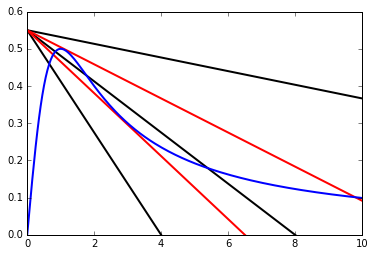

In [2]:
x = linspace(0,10,200)
axis(ymin=0, ymax=0.6)
r = 0.55
k = 4
plot(x, r * (1 - x / k), lw=2, color='black')
k = 8
plot(x, r * (1 - x / k), lw=2, color='black')
k = 30
plot(x, r * (1 - x / k), lw=2, color='black')
k = 6.5
plot(x, r * (1 - x / k), lw=2, color='red')
k = 12
plot(x, r * (1 - x / k), lw=2, color='red')
plot(x,x / (1 + x ** 2), lw=2, color='blue')

Bifurcations occur at parameter values for which the line and the curve are tangent, as illustrated (approximately) by the red lines above. To find these points, we have to solve the system:
$$
\mtab r\left(1-\frac{x}{k}\right)=\frac{x}{1+x^2},
\quad \frac{d}{dx}\left[r\left(1-\frac{x}{k}\right)\right]=\frac{d}{dx}\left[\frac{x}{1+x^2}\right].
$$
With some work, it is possible to find the following parametric equations for $r$ and $k$:
$$
\mtab r = \frac{2x^3}{(1+x^2)^2},\quad k=\frac{2x^3}{x^2-1}
$$
Notice that, since $k>0$, we must have $x>1$.
We can easily plot this:

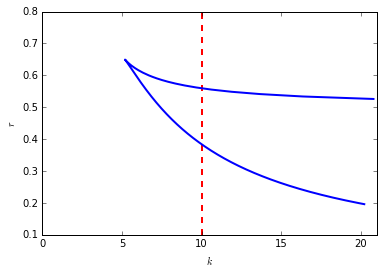

In [3]:
x = linspace(1.055,10,500)
axis(xmin=0, xmax=21, ymin=0.1, ymax=0.8)
r = 2 * x ** 3 / (1 + x ** 2) ** 2
k = 2 * x ** 3 / (x ** 2 - 1)
axvline(10, lw=2, color='red', ls='--')
plot(k,r, lw=2)

xlabel('$k$')
ylabel('$r$')

One interesting case is when there are two bifurcations, for example, for $k$ fixed but sufficiently large, as $r$ grows, as in the dashed line above. We would like to draw a bifurcation diagram for that case. This corresponds to the following picture:

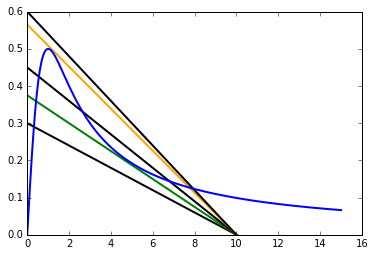

In [4]:
x = linspace(0,15,200)
axis(ymin=0, ymax=0.6)
k = 10
r = 0.3
plot(x, r * (1 - x / k), lw=2, color='black')
r = 0.375
plot(x, r * (1 - x / k), lw=2, color='green')
r = 0.45
plot(x, r * (1 - x / k), lw=2, color='black')
r = 0.565
plot(x, r * (1 - x / k), lw=2, color='orange')
r = 0.6
plot(x, r * (1 - x / k), lw=2, color='black')
plot(x,x / (1 + x ** 2), lw=2, color='blue')


This is the story that these curves tell:

- If $r$ is small, there is only one positive equilibrium, and it is stable. This is the "refuge" regime, and the budworms and forest coexist.
- As $r$ grows, there is a saddle-node bifurcation, (green line, approximately) and two new equilibra appear (the "threshold" equilibrium is unstable, the "outbrake" equilibrium is stable. Notice that small fluctuations of the budworm population don't cause any harm, since they will quickly converge to the "refuge" equilibrium point.
- As $r$ grows even further, there is another saddle-node bifurcation (orange line, approximately), and the "refuge" and "threshold" equilibria disappears. So, the population will converge to the "outbreak" equilibrium, which is always stable.

This story is best told by looking at the bifurcation diagram in this case. To be concrete, as above, we fix $k=10$. Then, to find the critical points at which the bifurcations occur we must solve the equation:
$$
\mtab
10 = \frac{2x^3}{x^2-1}
$$
This equation can't be solved exactly. So, we first try a graphical approach:

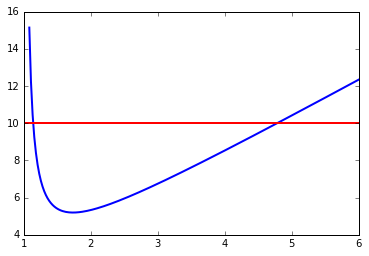

In [5]:
x = linspace(1.08, 6, 200)
k = 10
plot(x, 2 * x ** 3 / (x ** 2 - 1), lw=2)
axhline(k, lw=2, color='red')

We can clearly see the two solutions: one is near 1, the other is near 5. To get more precise approximations to the solutions, we can use a numerical method. We first define a function reprenting the equation:

In [6]:
def f(x):
    return k - (2 * x ** 3) / (x ** 2 - 1)

Now, lets use _Brent's method_ to find good approximations for the equilibrium points. Brent's method is not the fastest, but is guaranteed to find a root in an interval if one exists.

In [7]:
from scipy.optimize import brentq
x1 = brentq(f, 1.01, 2)
x2 = brentq(f, 4, 5)
x1,x2

(1.1378052016142224, 4.781283795978356)

Now we find the critical values of $r$:

In [8]:
r1 = (2 * x1) / (x1 ** 2 + 1) ** 2
r2 = (2 * x2) / (x2 ** 2 + 1) ** 2
r1, r2

(0.4321989185267382, 0.016796124175394327)

Recall that the equation for a nonzero equilibrium is:
$$
\mtab r\left(1-\frac{x}{k}\right)=\frac{x}{1+x^2}
$$
Again for plotting it is better to express $r$ as a function of $x$. We solve the equation for the equilibria
$$
\mtab r = \frac{kx}{(k-x)(1+x^2)} 
$$

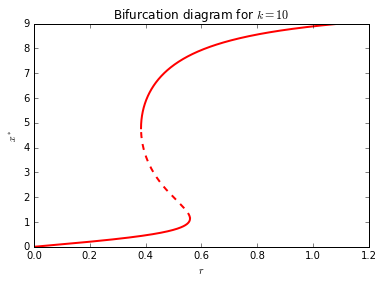

In [9]:
#axis(xmin=0,xmax=50)
x = linspace(0, x1, 300)
r = (k * x) / ((k - x) * (1 + x ** 2))
plot(r, x, lw=2, color='red')
x = linspace(x1, x2, 300)
r = (k * x) / ((k - x) * (1 + x ** 2))
plot(r, x, lw=2, color='red', ls='--')
x = linspace(x2, k-1, 300)
r = (k * x) / ((k - x) * (1 + x ** 2))
plot(r, x, lw=2, color='red')
title('Bifurcation diagram for $k={}$'.format(k))
xlabel('$r$')
ylabel('$x^*$')

We can clearly see the characteristic shape of the hysteresis curve, with the bistable region in the middle between the two critical values of $r$.